<a href="https://colab.research.google.com/github/DevindiSiwurathna/Covid-Prediction--RNN-Model/blob/main/Covid_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [ ]:
#import training data set
dataset_train=pd.read_csv('/content/raw_response_train1.csv')
training_set=dataset_train.iloc[:,1:2].values   


In [5]:
dataset_train.shape

(533, 2)

In [6]:
#feature scaling (normalization)

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
training_set_scaled=scale.fit_transform(training_set)



In [7]:
X_train = []
y_train = []
for i in range(60, 532):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
#reshape to make in format for keras function
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [9]:
#importing packages and libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
from keras.preprocessing.sequence import TimeseriesGenerator

generator = TimeseriesGenerator(training_set_scaled, training_set_scaled, length=X_train.shape[1], batch_size=10)

In [11]:

#initialise RNN
regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences = True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))

regressor.add(Dense(units=1))

In [12]:

regressor.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
#fitting the RNN

history = regressor.fit(generator,epochs=100)



Epoch 1/100
48/48 [==============================] - 11s 97ms/step - loss: 0.0236
Epoch 2/100
48/48 [==============================] - 5s 97ms/step - loss: 0.0112
Epoch 3/100
48/48 [==============================] - 5s 98ms/step - loss: 0.0089
Epoch 4/100
48/48 [==============================] - 5s 96ms/step - loss: 0.0062
Epoch 5/100
48/48 [==============================] - 5s 97ms/step - loss: 0.0052
Epoch 6/100
48/48 [==============================] - 5s 97ms/step - loss: 0.0043
Epoch 7/100
48/48 [==============================] - 5s 98ms/step - loss: 0.0041
Epoch 8/100
48/48 [==============================] - 5s 97ms/step - loss: 0.0034
Epoch 9/100
48/48 [==============================] - 5s 97ms/step - loss: 0.0037
Epoch 10/100
48/48 [==============================] - 5s 99ms/step - loss: 0.0043
Epoch 11/100
48/48 [==============================] - 5s 97ms/step - loss: 0.0030
Epoch 12/100
48/48 [==============================] - 5s 95ms/step - loss: 0.0028
Epoch 13/100
48/48 [====

In [14]:
print(history.history.keys())

dict_keys(['loss'])


In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,epoch
95,0.002969,95
96,0.002616,96
97,0.002382,97
98,0.002644,98
99,0.002689,99


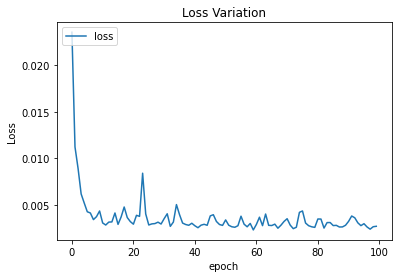

In [16]:

plt.plot(history.history['loss'])
plt.title('Loss Variation')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

In [17]:
#prediction and visulaizing the result
dataset_test=pd.read_csv('raw_response_test.csv')
real_count=dataset_test.iloc[:,1:2].values   #we need a matrix instead of vector for future calculations so[:,1:2] and not [:,1]


In [18]:
dataset_total = pd.concat((dataset_train['count'], dataset_test['count']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scale.transform(inputs)
X_test = []
for i in range(60, 90):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_count = regressor.predict(X_test)
predicted_count = scale.inverse_transform(predicted_count)

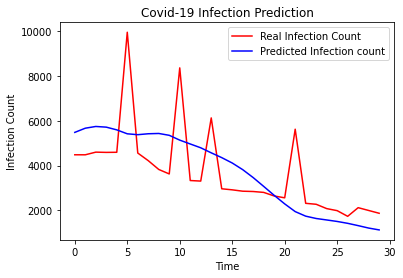

In [19]:
#visualising the results
plt.plot(real_count,color='red',label='Real Infection Count')
plt.plot(predicted_count,color='blue',label='Predicted Infection count')
plt.title('Covid-19 Infection Prediction')
plt.xlabel('Time')
plt.ylabel('Infection Count')
plt.legend()
plt.show()